In [159]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [160]:
df=pd.read_csv('advertising.csv')
print(df.head())
print(df.tail())

      TV  Radio  Newspaper  Sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3   12.0
3  151.5   41.3       58.5   16.5
4  180.8   10.8       58.4   17.9
        TV  Radio  Newspaper  Sales
195   38.2    3.7       13.8    7.6
196   94.2    4.9        8.1   14.0
197  177.0    9.3        6.4   14.8
198  283.6   42.0       66.2   25.5
199  232.1    8.6        8.7   18.4


In [161]:
print(df.shape)
print(df.dtypes)
print(df.info)

(200, 4)
TV           float64
Radio        float64
Newspaper    float64
Sales        float64
dtype: object
<bound method DataFrame.info of         TV  Radio  Newspaper  Sales
0    230.1   37.8       69.2   22.1
1     44.5   39.3       45.1   10.4
2     17.2   45.9       69.3   12.0
3    151.5   41.3       58.5   16.5
4    180.8   10.8       58.4   17.9
..     ...    ...        ...    ...
195   38.2    3.7       13.8    7.6
196   94.2    4.9        8.1   14.0
197  177.0    9.3        6.4   14.8
198  283.6   42.0       66.2   25.5
199  232.1    8.6        8.7   18.4

[200 rows x 4 columns]>


In [162]:
df.isna().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

Text(0.5, 1.0, 'Product Sales')

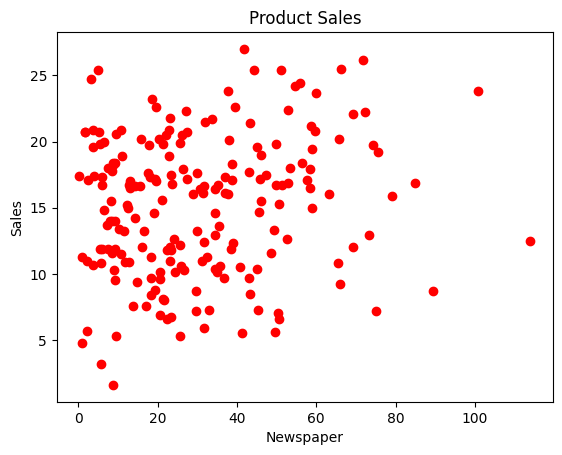

In [163]:
plt.scatter(df['Newspaper'],df['Sales'], color='r')
plt.xlabel('Newspaper')
plt.ylabel('Sales')
plt.title('Product Sales')

Text(0.5, 1.0, 'Product Sales')

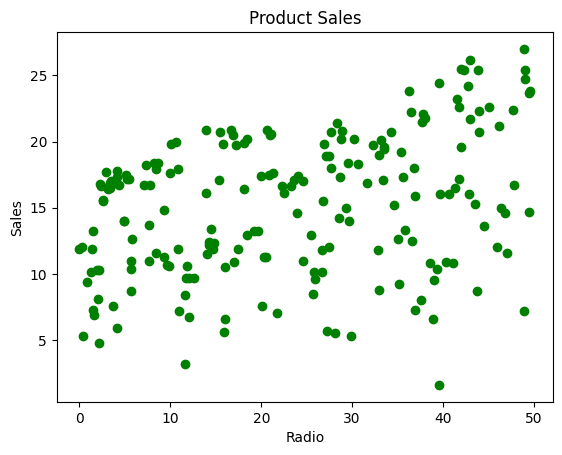

In [164]:
plt.scatter(df['Radio'],df['Sales'], color='g')
plt.xlabel('Radio')
plt.ylabel('Sales')
plt.title('Product Sales')

Text(0.5, 1.0, 'Product Sales')

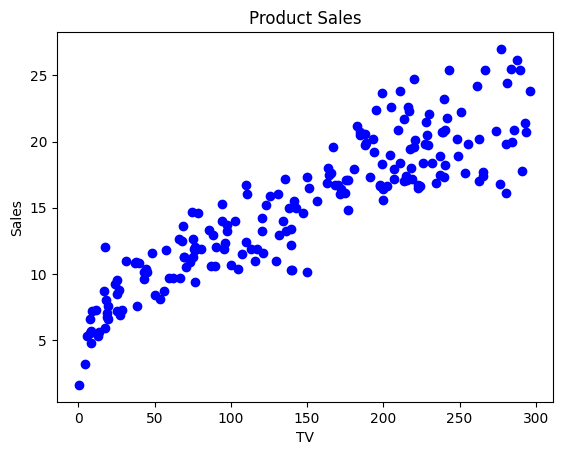

In [165]:
plt.scatter(df['TV'],df['Sales'], color='b')
plt.xlabel('TV')
plt.ylabel('Sales')
plt.title('Product Sales')

<Axes: xlabel='Newspaper', ylabel='Sales'>

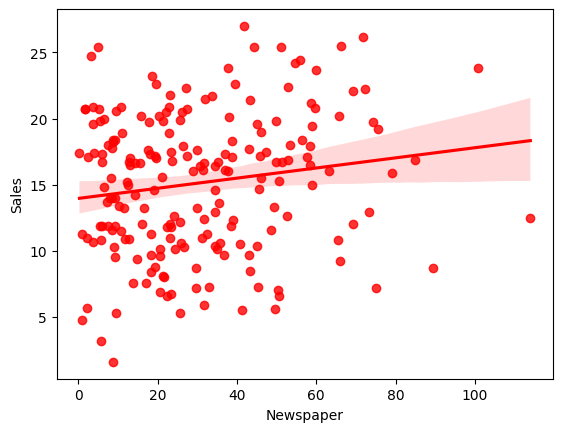

In [166]:
y=df['Sales']
sns.regplot(x=df['Newspaper'],y=y,color='r')

<Axes: xlabel='Radio', ylabel='Sales'>

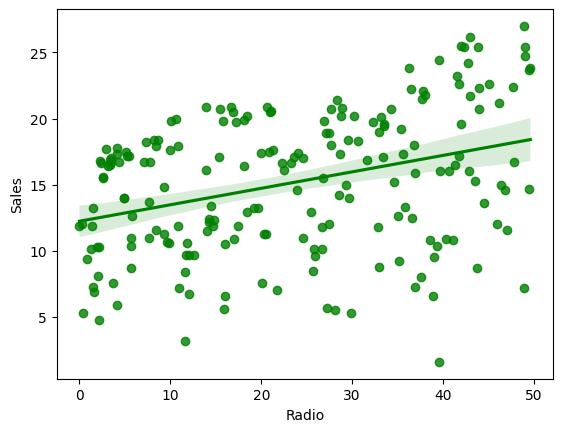

In [167]:
sns.regplot(x=df['Radio'],y=y,color='g')

<Axes: xlabel='TV', ylabel='Sales'>

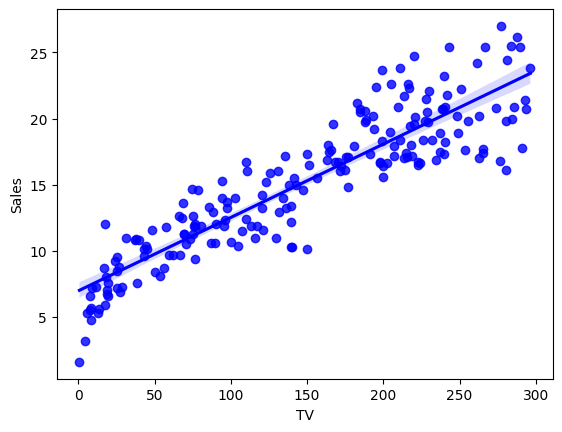

In [168]:
sns.regplot(x=df['TV'],y=y,color='b')

In [169]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [170]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [171]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
y_pred

array([17.2839429 , 12.32581597, 15.20213987, 18.89185879,  7.24823033,
       15.50200216, 19.07524151,  8.64227379, 24.63178784, 10.81749729,
       16.44605583,  9.67789969, 16.38631372, 19.45085568, 13.72247757,
        6.98991432, 23.6877234 , 22.31341206,  8.00519242, 14.90822867,
       13.83065147, 15.25002986, 21.38817834, 15.86563689,  7.80833588,
       21.63693319, 18.31147635,  5.37228457, 19.68052199, 17.83711582,
       11.56371266,  5.53379079, 15.98709837, 13.12380925, 21.59830689,
        8.97259195, 21.17431352, 13.26423873, 20.21834879, 12.61024743,
       17.32699493, 14.16879123,  8.75172365, 21.37948326, 18.7738495 ,
       21.10385664, 15.3476967 , 18.14328675, 12.30275799,  7.19842544,
       11.6492353 , 12.23689249, 10.44216685, 17.31123807, 16.6222954 ,
       23.03192458, 18.62226498, 12.01349807, 14.11993788, 22.02327066])

In [172]:
print(model.predict([[34,10,34]]))

[7.65796948]


c:\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [173]:
# print("Slope is",model.coef_)
print("Slope is",list(zip(x,model.coef_)))

Slope is [('TV', np.float64(0.054904520954075504)), ('Radio', np.float64(0.09880579771433182)), ('Newspaper', np.float64(0.003349826439992029))]


In [174]:
# lst=list(model.coef_)
# lst2=list(x.columns)
# for i in range(len(lst)):
#     print("Slope of",lst2[i],lst[i])


In [175]:
print("Constant is",model.intercept_)
# value=list(zip(x,model.intercept_))
# value

Constant is 4.68926368730094


In [176]:
df1=pd.DataFrame({'Actual_Value':y_test,'Predicted_Value':y_pred,'Difference':y_test-y_pred})
df1

,Actual_Value,Predicted_Value,Difference
3,16.5,17.283943,-0.783943
151,11.6,12.325816,-0.725816
19,14.6,15.202140,-0.602140
48,19.8,18.891859,0.908141
106,7.2,7.248230,-0.048230
118,15.9,15.502002,0.397998
141,19.2,19.075242,0.124758
170,8.4,8.642274,-0.242274
198,25.5,24.631788,0.868212
13,13.7,10.817497,2.882503


In [177]:
from sklearn.metrics import mean_absolute_error
MAE=mean_absolute_error(y_test,y_pred)
MAE

1.002662007827826

In [178]:
from sklearn.metrics import mean_absolute_percentage_error
MAPE=mean_absolute_percentage_error(y_test,y_pred)
MAPE

0.07225639306575676

In [179]:
from sklearn.metrics import mean_squared_error
MSE=mean_squared_error(y_test,y_pred)
MSE

2.1043598780596695

In [180]:
from sklearn.metrics import root_mean_squared_error
RMSE=root_mean_squared_error(y_test,y_pred)
RMSE

1.4506411954924172

In [181]:
from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred)
score

0.9207456779653793